In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import math

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('Dataset.csv')

# Overview of Notebook
## Data Cleaning

- Fixed errors to have the most usable data

- About 16% of rows were NULL in "SumAppTime" column
    - Don't want to drop. Still usable data
    
- Checked for correlations, to extrapolate missing data
    - No correlations in heat grid
    - Had to use mean or median 


- Side Finding: Heat grid showed very little to no correlation between Scanned Problems and Editor Problems 


- Histogram shows the mean is far out from where most of the values fall. 
    - Outliers
    - Filling NULL with mean could change metrics
    - Opting to fill NULL values with the median (the number that is most common in the dataset). 

- Everything else was clean
    - Only had to change "Date" to datetime

## Data Exploration

In this section of the notebook, I looked at each of the different variables with a closer lens to see what types of data I can extract. 

### Country

- 2/3 of all Users are from America
- India, Philippines, Indonesia are in top 5
    - UK not in top 5, despite 97% English Speakers and developed
- 144 Countries
- Nigeria, according to research, has 80,000,000 English speakers

### Scans and Editors

- 28% of sessions without a scan
- 50% of sessions without an Edit
- Counting up the uses of both functions, the Editor is used twice as many times

### By Platform

- Twice as many IOS users as Android
    - Android ~40% of US market in 2018
    - Both still large enough to optimize
    
- Slightly Interesting: IOS use 0.5 days more. Could be interesting

## Analyzing Retention

My definition for whether or not a customer is retained is if the clients latest log in date is two weeks after the creation of the account. 

For this analysis, I am doing weekly retention, meaning they are included in each bracket if they sign in during the 1st, 2nd, 3rd, etc. weeks after they started using the app.

For example, if the person created their account on January 15th, they will be considered as retained if they use it again after the 29th.

### For this analysis, I had to add a few columns to make it more useful

1.) "Date_first": contains the date of each user's first sign in

2.) "WeeksOut": Number of weeks out that the day is from the user's first sign in. This will be used to find the retention

3.) "TwoWeeksAppTime": The amount of time spent in the app in the first two weeks of using the App

4.) "TwoWeeksScanned": The number of scans made in the first two weeks of using the App

5.) "TwoWeeksEditor": The number of editor problems made in the first two weeks of using the App

6.) "TwoWeeksTotal": The total number of events performed within the first two weeks of using the App 

Features 3-6 were added in order to find out if first two weeks of Usage impact retention

### Charts

For retention, I opted to display retention, as I mentioned earlier, on a weekly retention graph. The first point is the propportion of people who signed in the first week they started using the product, so this should be 100%. The second point is the proportion of those same people that signed in during week 2, the third point for week 3 and so on. 

**Total Retention**
For English-speaking users who signed up between January 15th and 21st, 2018.

- 30% of users are retained after 2 weeks
    - 2 weeks because length of Chapter
- 18.6% retained after 5 weeks
    - 5 weeks because length of Unit 

**IOS vs Android**

I compared retention of users between IOS users and Android users. 

| Platform | 2-week | 5-week |
| -------- | ------ | ------ |
|    IOS   |  29.8% |  19.1% |
| ANDROID  |  30.3% |  17.8% |

- No major difference



**US vs Non-US**

I compared retention of users between American users and non-American users. Keep in mind that this is for English-speakers. 

| Country | 2-week | 5-week |
| ------- | ------ | ------ |
| US      |  30.7% |  19.1% |
| Non-US  |  26.8% |  15.8% |

- Decrease is drastic
- Almost 4% less retention 
    - Potentially 10s of thousands of lost costumers

### Retention by Usage Metrics


| Metric | Above/Below Median | 2-week | 5-week |
|--------|-------------| ------ | ------ |
| App Time | <p>Above <p> Below | <p> 49.7% <p>10.3% |  <p> 28.0% <p>9.3%|
| Scanned Problems | <p>Above <p> Below | <p> 46.1% <p>13.5% |  <p> 26.1% <p>10.8%|
| Editor Problems | <p>Above <p> Below | <p> 44.3% <p>15.7% |  <p> 26.4% <p>10.8%|  
| Total Events | <p>Above <p> Below | <p> 48.0% <p>12.0% |  <p> 27.4% <p>9.8%|
    
- In general, increasing App Time on the product seems to yield more retention
    
### Revisiting loss of retention in Non-Americans 

| Metric | Above/Below Median | 2-week | % Change | 5-week | % Change |
|--------|-------------| ------ | ------ | --- | --- |
| App Time | <p>Above <p> Below | <p> 45.8% <p>10.3% | <p> -7.8% <p> 0.0% |  <p> 24.0% <p>8.7%| <p> -14.3%% <p>-6.5% |
| Scanned Problems |<p>Above <p> Below| <p> 38.7% <p>11.1% | <p> -16.1% <p> -17.8% | <p> 16.1% <p>11.1% | <p> -37.9% <p>+2.8% |
| Editor Problems | <p>Above <p> Below| <p> 38.4% <p>16.3% | <p> -13.3% <p> +3.8% | <p> 22.8% <p>9.7%| <p> -13.6% <p>-10.2% |  
| Total Events | <p>Above <p> Below | <p> 42.2% <p>13.0% | <p> -12.1% <p> +8.3% | <p> 24.0% <p>8.4%| <p> -12.4% <p>-14.3% |
    
**How to Use the Table**
- Which metric has the largest difference from the Total?
    - Especially when above the Median
    
**Results**
- Above Median for Scanned Problems has big decrease
    - Non-Americans not yielding as much value
    - Can use a lot, but won't retain
    - Two Directions:
        - Figure out **why**
        - Prioritize improving the Editor
        
### Differences in Usage between American/Non-American

- Americans used Editor more than Non-Americans
    - First two weeks, Americans logged a median of twice as many
        - 40 vs 20

- No other differences between countries
    - With different data, could analyze specific events

## Findings & Recommendations

### There is a drop in retention between American’s and Non-Americans. 

- Sessions were **more likely** to have at least one **Scan**
- Despite this, **Editor  is used more times in total** 


- Americans use Editor twice as much as Non-Americans
    - Largest difference. Could lead to loss in retention?
    - Trouble with access?


For the A/B test
- Since renention drops for Non-Americans, try "Translations", or less language-based instructions
    - Specifically try increasing Editor
    
- From Retention Metrics charts
    - \# of Scanned Problems for Non-Americans doesn't increase retention
        - Team should be focusing on Editor to increase retention for Non-Americans
        
        
Further Findings 
- UK is not being utilized. Potentially try increasing market/marketing here
    - Since marketing is new 
- Nigeria has 80,000,000 English speakers
    - Tap into underdeveloped Countries + Improve translation capabilities
    
**Data that could be useful in the future**

- Specific Events rather than "Total Events"
    - Perform same analysis with different events
- Usage in different languages (if thats available)
- At least 2 Months of data for start dates
    - Retention could change depending on day of install
    
- Teacher vs. Student vs. Parent
    - Need a column with categorical data

_____

# Data Cleaning

There are only NULL values in the SumAppTime column. There are 21,000 of these rows, ~16% of the data, so if need be this can be dropped, but that is not ideal, since there is other information we can get from these rows. Let's look into these rows. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131782 entries, 0 to 131781
Data columns (total 8 columns):
UserId                  131782 non-null object
Date                    131782 non-null object
Platform                131782 non-null object
Country                 131642 non-null object
SumAppTime              110099 non-null float64
CountScannedProblems    131782 non-null int64
CountEditorProblems     131782 non-null int64
TotalEventsPerUser      131782 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 8.0+ MB


How could they have recorded events, scanned problems, and edited problems without logging time in the app?

In [5]:
null_times = df[df['SumAppTime'].isnull()]

In [6]:
null_times.head(10) # exploring what these rows with null values looks like

,UserId,Date,Platform,Country,SumAppTime,CountScannedProblems,CountEditorProblems,TotalEventsPerUser
0,8ba44406b5f7f,2018-02-25,ANDROID,United States,NaN,0,0,1
3,1089730706fcb9,2018-01-16,ANDROID,United States,NaN,0,0,59
4,1089730706fcb9,2018-01-17,ANDROID,United States,NaN,0,0,1
19,4efe14b8c00223,2018-02-03,ANDROID,United States,NaN,0,0,1
23,4f1c61b2098458,2018-04-24,ANDROID,United States,NaN,0,0,1
25,577f42d7c29cb1,2018-01-16,ANDROID,United States,NaN,0,6,477
27,6204a184aea579,2018-01-20,ANDROID,India,NaN,0,0,65
28,63b0dde4f74961,2018-04-29,ANDROID,India,NaN,0,0,1
29,70dd5afa38f6c1,2018-01-19,ANDROID,United States,NaN,0,0,1
31,77f6b72e0d4501,2018-02-04,ANDROID,United States,NaN,0,0,1


In [7]:
null_times.groupby('Platform').UserId.count() # these are occuring in both Android and IOS devices. Not Platform specific

Platform
ANDROID     7414
IOS        14269
Name: UserId, dtype: int64

In [8]:
null_times.describe() # There are recorded uses of the app while there was no time recorded. This must be a bug.

,SumAppTime,CountScannedProblems,CountEditorProblems,TotalEventsPerUser
count,0.0,21683.000000,21683.000000,21683.000000
mean,NaN,2.339390,3.287276,138.384310
std,NaN,5.675281,11.111932,240.341432
min,NaN,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,18.000000
50%,NaN,1.000000,0.000000,64.000000
75%,NaN,2.000000,2.000000,165.000000
max,NaN,152.000000,526.000000,9033.000000


What can we do to replace these values? Let's check if there is a direct correlation between SumAppTime and TotalEventsPerUser. This is a logical assumption, since the more events you perform, it is likely that you are spending more time in the app. 

There seems to be some outliers on both the number of events and the app time. Let's investigate.

In [9]:
data = df[['SumAppTime','CountScannedProblems','CountEditorProblems','TotalEventsPerUser']].dropna()

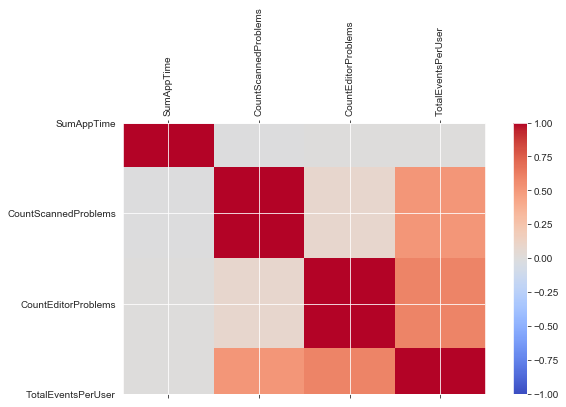

In [10]:
# This is a correlation plot, where it plots each variable against each other one and returns how related it is to the other
# As you can see, SumAppTime actually has no correlation to any of the other variables, so we unfortunately
# will not be able to use any of the other columns to infer upon what the null values could be

corr = data.corr()
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

There are outliers, resulting in the histogram not looking good

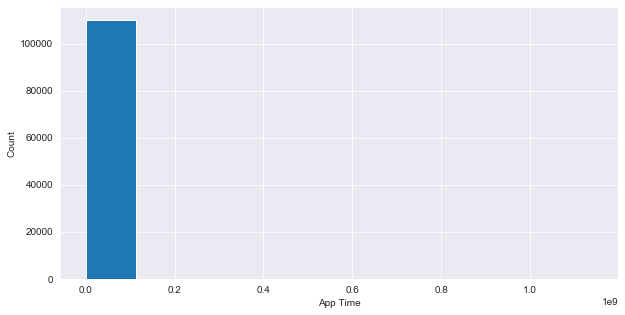

In [11]:
fig, ax = plt.subplots(figsize = (10,5))

_ = df['SumAppTime'].plot(kind = 'hist')
_ = plt.ylabel('Count')
_ = plt.xlabel('App Time')

In [12]:
def IQR(df, col):
    """
    input df: dataframe
    input col: column that we want the IQR of
    
    output low_outliers: The number that, if the value is lower than, then it is lower than 1.5*IQR of the first quartile
    output high_outliers: The number that, if the vlaue is higher than, then it is a higher than 1.5*IQR of the third quartile
    """
    df_no_null = df[df[col].notnull()] 
    
    q1 = np.quantile(df_no_null[col], 0.25) 
    q3 = np.quantile(df_no_null[col], 0.75) 
    
    iqr = abs(q3 - q1)
    
    low_outliers = q1 - 1.5*iqr
    high_outliers = q3 + 1.5*iqr
    
    return (low_outliers, high_outliers)

In [13]:
# example of the values that are in and out of the IQR
IQR(df, 'SumAppTime')

(-851.5, 1576.5)

In [14]:
# dropping outliers of the "SumAppTime" column
df_dropped_time_outliers = df[df['SumAppTime'] <= IQR(df, 'SumAppTime')[1]]

As you can see, there are a lot of outliers that throw off the mean of the dataset by a large amount. Because of this, I will fill the missing values with the median of the dataset. 

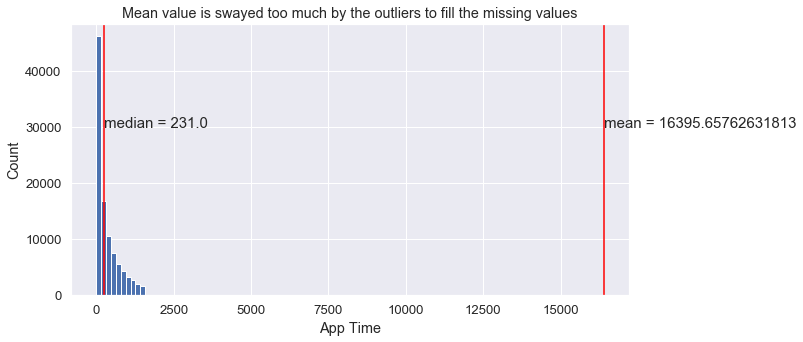

In [15]:
sns.set(font_scale = 1.2)

_ = plt.title('Mean value is swayed too much by the outliers to fill the missing values')

_ = df_dropped_time_outliers['SumAppTime'].plot(kind = 'hist', figsize = (10,5))
_ = plt.ylabel('Count')
_ = plt.xlabel('App Time')

_ = plt.axvline(df['SumAppTime'].mean(), color = 'red') 
_ = plt.text(x = df['SumAppTime'].mean(), y = 30000, s = 'mean = {}'.format(df['SumAppTime'].mean()), size = 15)

_ = plt.axvline(df['SumAppTime'].median(), color = 'red')
_ = plt.text(x = df['SumAppTime'].median(), y = 30000, s = 'median = {}'.format(df['SumAppTime'].median()), size = 15)


In [16]:
df.fillna(df['SumAppTime'].median(), inplace = True) # filling missing values with Median of Dataset

In [17]:
# no more null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131782 entries, 0 to 131781
Data columns (total 8 columns):
UserId                  131782 non-null object
Date                    131782 non-null object
Platform                131782 non-null object
Country                 131782 non-null object
SumAppTime              131782 non-null float64
CountScannedProblems    131782 non-null int64
CountEditorProblems     131782 non-null int64
TotalEventsPerUser      131782 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 8.0+ MB


Converting the Date column to datetime

In [18]:
df['Date'] = pd.to_datetime(df['Date']) 

In [19]:
# date is now datetime, so it can be used for charts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131782 entries, 0 to 131781
Data columns (total 8 columns):
UserId                  131782 non-null object
Date                    131782 non-null datetime64[ns]
Platform                131782 non-null object
Country                 131782 non-null object
SumAppTime              131782 non-null float64
CountScannedProblems    131782 non-null int64
CountEditorProblems     131782 non-null int64
TotalEventsPerUser      131782 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 8.0+ MB


# Data Exploration

## In this section of the notebook, I am going to look through each variable and see if there's anything interesting that stands out. 

## Analyzing Usage by Country

**Results**
- 2/3 of all Users are from America
- India, Philippines, Indonesia are in top 5
    - UK not in top 5, despite 97% English Speakers and developed
- 144 Countries
- Nigeria, according to research, has 80,000,000 English speakers


In [20]:
# counting up the unique users from each country
df.groupby('Country').nunique().UserId.sort_values(ascending = False) 

Country
United States       17923
India                 712
Philippines           479
Canada                258
Indonesia             197
                    ...  
Marshall Islands        1
Malta                   1
St. Lucia               1
Luxembourg              1
Namibia                 1
Name: UserId, Length: 144, dtype: int64

There are only 169 unique users who signed up in the UK between January 15 and 21. Though this ranks in the top 10 in this dataset, I thought it might have been higher since the UK is arguably more developed than some of the other countries on the list, like India or the Philippines

In [21]:
# yields number of new users for UK
df[df['Country'] == 'United Kingdom'].UserId.nunique()

169

In [22]:
# yields number of new users for Nigeria
df[df['Country'] == 'Nigeria'].UserId.nunique()

49

## Analyzing by Scanned and Editor Problems

**Results**
- 28% of sessions without a scan
- 50% of sessions without an Edit
- Counting up the uses of both functions, the Editor is used twice as many times


Many users have sessions where they don't scan a problem at all. About 28% of all sessions did not consist of a scan. 

In [23]:
df_dropped_scan_outliers = df[df['CountScannedProblems'] <= IQR(df, 'CountScannedProblems')[1]]

In [24]:
(len(df_dropped_scan_outliers[df_dropped_scan_outliers['CountScannedProblems'] == 0])/len(df_dropped_scan_outliers))*100

27.994629971471724

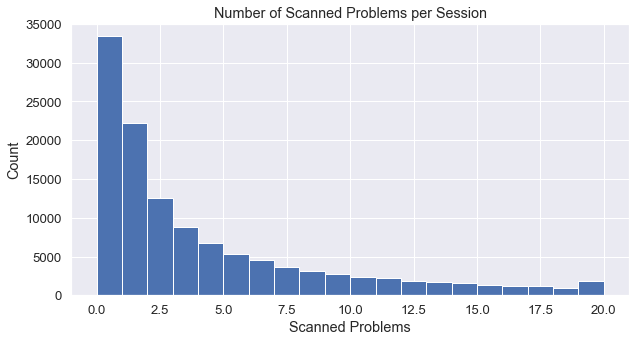

In [125]:
sns.set(font_scale = 1.2)

_ = plt.title('Number of Scanned Problems per Session')

_ = df_dropped_scan_outliers['CountScannedProblems'].plot(kind = 'hist', figsize = (10,5), bins = 20)
_ = plt.ylabel('Count')
_ = plt.xlabel('Scanned Problems')

In [26]:
df_dropped_edit_outliers = df[df['CountEditorProblems'] <= IQR(df, 'CountEditorProblems')[1]]

There are more sessions, comparatively, where no editor problems are inputted into the app. 

In [27]:
100*(len(df_dropped_edit_outliers[df_dropped_edit_outliers['CountEditorProblems'] == 0])/len(df_dropped_edit_outliers))

48.46757254918771

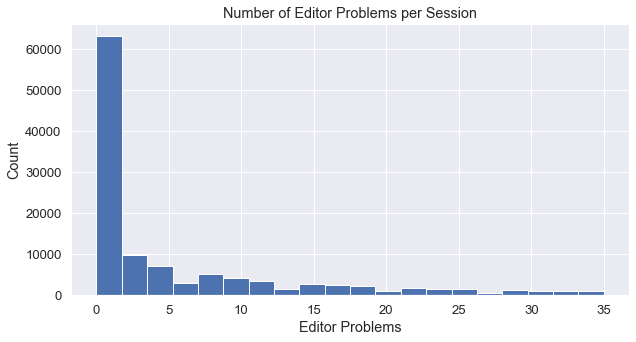

In [126]:
sns.set(font_scale = 1.2)

_ = plt.title('Number of Editor Problems per Session')

_ = df_dropped_edit_outliers['CountEditorProblems'].plot(kind = 'hist', figsize = (10,5),bins = 20)
_ = plt.ylabel('Count')
_ = plt.xlabel('Editor Problems')

The Editor is used much more than the Scanner actually. 

In [29]:
df.CountScannedProblems.sum()

971705

In [30]:
df.CountEditorProblems.sum()

1966790

## By Platform

**Results**
- Twice as many IOS users as Android
    - Android ~40% of US market in 2018
    - Both still large enough to optimize
- IOS use 0.5 days more. Could be interesting


In [31]:
# yields the number of unique users per platform
unique_per_platform = df.groupby('Platform').UserId.nunique()

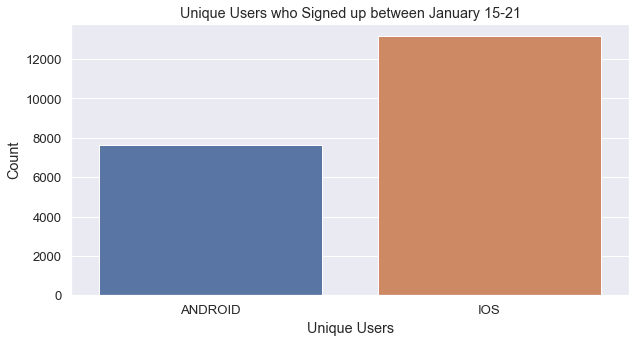

In [32]:
sns.set(font_scale = 1.2)

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.barplot(x = 'Platform', y = 'UserId', data = unique_per_platform.reset_index())\
        .set_title('Unique Users who Signed up between January 15-21')

_ = plt.xlabel('Unique Users')
_ = plt.ylabel('Count')

In [33]:
# This returns the number of total uses per platform
count_per_platform = df.groupby('Platform').UserId.count()

In [34]:
count_per_platform

Platform
ANDROID    45917
IOS        85865
Name: UserId, dtype: int64

In [35]:
# This returns the average number of different days that a user has used the product. 

count_per_platform/unique_per_platform

Platform
ANDROID    6.016378
IOS        6.534130
Name: UserId, dtype: float64

# Analyzing the Retention

My definition for whether or not a customer is retained is if the clients latest log in date is two weeks after the creation of the account. 

For this analysis, I am performing weekly retention, meaning they are included in each subsequent bracket if they signed in during the 1st, 2nd, 3rd, etc. weeks after they started using the app.

For example, if the person created their account on January 15th, they will be considered as retained if they use it again during the week of the 29th pr later.

In [36]:
# this dataframe is the first day that the user signed in 

first_date = df.groupby('UserId').Date.min().reset_index()

In [37]:
first_date.Date.unique() # These values make sense. They go from January 15th to 21st 2018. 

array(['2018-01-18T00:00:00.000000000', '2018-01-19T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-16T00:00:00.000000000', '2018-01-17T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [38]:
# by joining the two tables, I can get a column for each user that displays the first time they signed in

df_wfirst = df.merge(first_date, how = 'inner', on = 'UserId', suffixes = ('','_first'))

In [39]:
df_wfirst.head()

,UserId,Date,Platform,Country,SumAppTime,CountScannedProblems,CountEditorProblems,TotalEventsPerUser,Date_first
0,8ba44406b5f7f,2018-02-25,ANDROID,United States,231.0,0,0,1,2018-01-16
1,8ba44406b5f7f,2018-02-06,ANDROID,United States,145.0,0,0,30,2018-01-16
2,8ba44406b5f7f,2018-02-12,ANDROID,United States,24.0,0,0,72,2018-01-16
3,8ba44406b5f7f,2018-01-23,ANDROID,United States,169.0,2,0,125,2018-01-16
4,8ba44406b5f7f,2018-01-16,ANDROID,United States,265.0,13,0,340,2018-01-16


In [40]:
# 7 days in the correct format to use in calculations

d = datetime.timedelta(days = 7)

In [41]:
# Takes the difference between the first use and the current row's use, and calculates the number of weeks
# There are two options here, to use a simple rounding (ex. 0.8 weeks = 1 week) or using the number of
# whole weeks (ex. 0.8 weeks = 0 weeks). You can choose which one to analyze below

# simple round
df_wfirst['WeeksOut'] = np.round(((df_wfirst.Date - df_wfirst.Date_first)/d),0)

# Whole weeks
#df_wfirst['WeeksOut'] = [math.floor(x) for x in (df_wfirst.Date - df_wfirst.Date_first)/d]

In [42]:
df_wfirst.head()

,UserId,Date,Platform,Country,SumAppTime,CountScannedProblems,CountEditorProblems,TotalEventsPerUser,Date_first,WeeksOut
0,8ba44406b5f7f,2018-02-25,ANDROID,United States,231.0,0,0,1,2018-01-16,6.0
1,8ba44406b5f7f,2018-02-06,ANDROID,United States,145.0,0,0,30,2018-01-16,3.0
2,8ba44406b5f7f,2018-02-12,ANDROID,United States,24.0,0,0,72,2018-01-16,4.0
3,8ba44406b5f7f,2018-01-23,ANDROID,United States,169.0,2,0,125,2018-01-16,1.0
4,8ba44406b5f7f,2018-01-16,ANDROID,United States,265.0,13,0,340,2018-01-16,0.0


In [43]:
len(df_wfirst)

131782

In [44]:
def get_retention_metrics(df):
    """
    This function is used to calculating how many people are coming back for each week after they started using the product. 
    input df: dataframe
    
    output retention_percent: the percentage of users who come back each subsequent week. 
    """
    
    # This ensures that each user is only counted once per week
    df_deduped = df.drop_duplicates(subset = ['UserId','WeeksOut'])
    
    # This counts the number of people returning each week
    retention = df_deduped['WeeksOut'].reset_index().groupby('WeeksOut').count()
    
    # this converts the above metric into a percentage, to make it more consumable
    retention_percent = 100*(retention/retention.loc[0])
    
    return retention_percent

In [45]:
# Returns metrics from Week 2
get_retention_metrics(df_wfirst).loc[2].values

array([30.01010928])

### Total Retention 

**Results**

- 30% of users are retained after 2 weeks
    - 2 weeks because length of Chapter
- 18.6% retained after 5 weeks
    - 5 weeks because length of Unit 

In [46]:
def plot_retention(retention_metrics, title):
    twoWeek_retention = round(retention_metrics.loc[2].values[0],1)

    fiveWeek_retention = round(retention_metrics.loc[5].values[0],1)
    
    _ = retention_metrics.plot(figsize=(10,5), legend = None)
    _ = plt.title(title)
    _ = plt.xticks(np.arange(0, 10.1, 1))
    _ = plt.xlim(0, 10)
    _ = plt.ylabel('% of Users Returning')
    _ = plt.xlabel('Weeks from First Use')

    _ = plt.text(2, twoWeek_retention+5, s = '{}% Retained after two weeks'.format(twoWeek_retention))

    _ = plt.text(5, fiveWeek_retention-10, s = '{}% Retained after five weeks'.format(fiveWeek_retention))

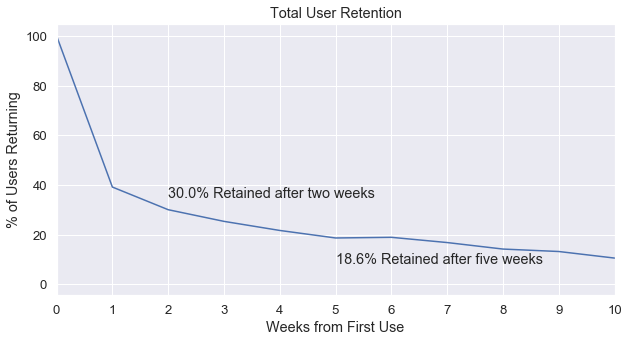

In [47]:
plot_retention(get_retention_metrics(df_wfirst), 'Total User Retention')

In [48]:
def get_and_plot_retention(df, title):
    metrics = get_retention_metrics(df)
    
    plot_retention(metrics, title)

### Retention by Platform

  Comparing IOS to Android

**Results**

| Platform | 2-week | 5-week |
| -------- | ------ | ------ |
|    IOS   |  29.8% |  19.1% |
| ANDROID  |  30.3% |  17.8% |

- No major difference

In [49]:
android = df_wfirst[df_wfirst['Platform'] == 'ANDROID']
ios = df_wfirst[df_wfirst['Platform'] == 'IOS']

The retention rates for IOS and Android are approximately the same, for the week of January 15th. 

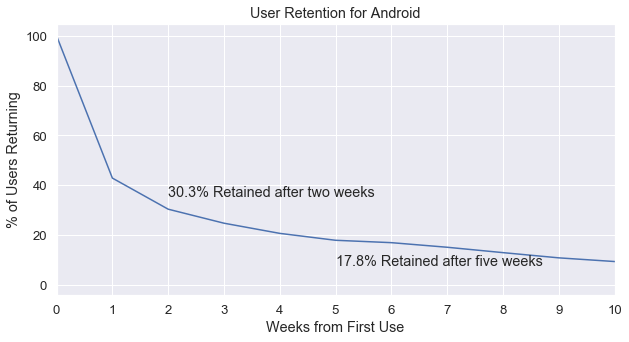

In [50]:
get_and_plot_retention(android, 'User Retention for Android')

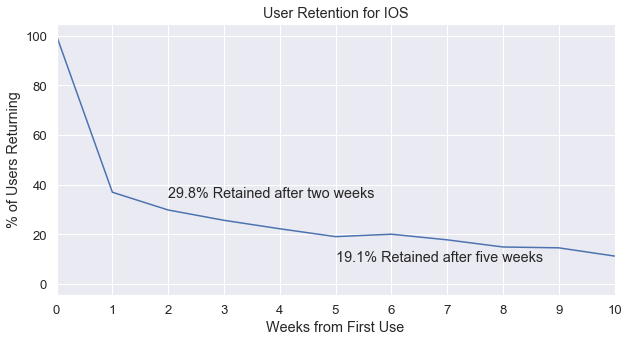

In [51]:
get_and_plot_retention(ios, 'User Retention for IOS')

### Retention by Country (American/non-American)

Keep in mind that this is for English-speakers.

**Results**

| Country | 2-week | 5-week |
| ------- | ------ | ------ |
| US      |  30.7% |  19.1% |
| Non-US  |  26.8% |  15.8% |

- Decrease is drastic
- Almost 4% less retention 
    - Potentially 10s of thousands of lost costumers

In [52]:
america = df_wfirst[df_wfirst['Country'] == 'United States']

non_american = df_wfirst[df_wfirst['Country'] != 'United States']

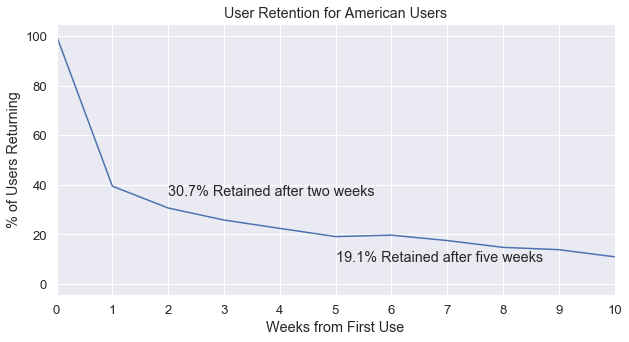

In [53]:
get_and_plot_retention(america, 'User Retention for American Users')

Our first retention rates that are lower than the general. The retention metrics are lower for non-American english users than for American English speaking users. 

Maybe Photomath should invest in non-english translations for the app.

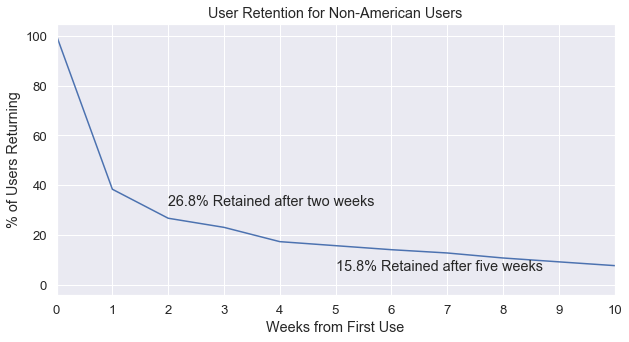

In [54]:
get_and_plot_retention(non_american, 'User Retention for Non-American Users')

### Retention by Usage

- Summing up the amount of usage for each user in their first two weeks and see how that affects retention
- Two graphs generated, for each variable; App Time, Scanned Problems, Editor Problems, and Total Events
    - One for all users below the median, and one for those above. 

**Results**

| Metric | Above/Below Median | 2-week | 5-week |
|--------|-------------| ------ | ------ |
| App Time | <p>Above <p> Below | <p> 49.7% <p>10.3% |  <p> 28.0% <p>9.3%|
| Scanned Problems | <p>Above <p> Below | <p> 46.1% <p>13.5% |  <p> 26.1% <p>10.8%|
| Editor Problems | <p>Above <p> Below | <p> 44.3% <p>15.7% |  <p> 26.4% <p>10.8%|  
| Total Events | <p>Above <p> Below | <p> 48.0% <p>12.0% |  <p> 27.4% <p>9.8%|
    
- In general, increasing App Time on the product seems to yield more retention

In [55]:
# Because the first two weeks are important to us for retention, I am going to sum up the amount of usage for each user
# in their first two weeks and see how that changes retention

usage = df_wfirst[df_wfirst['WeeksOut'] <= 2.0].groupby('UserId').sum()[['SumAppTime','CountScannedProblems'\
                                                                 ,'CountEditorProblems','TotalEventsPerUser']]

usage.rename(mapper = {'SumAppTime':'TwoWeeksAppTime','CountScannedProblems':'TwoWeeksScanned',
                       'CountEditorProblems':'TwoWeeksEditor','TotalEventsPerUser':'TwoWeeksTotal'}, axis = 1, inplace = True)

In [56]:
df_with_usage = df_wfirst.merge(usage, on = 'UserId')

In [57]:
df_with_usage[['TwoWeeksAppTime','TwoWeeksScanned','TwoWeeksEditor','TwoWeeksTotal']].describe()

,TwoWeeksAppTime,TwoWeeksScanned,TwoWeeksEditor,TwoWeeksTotal
count,1.317820e+05,131782.000000,131782.000000,131782.000000
mean,1.251242e+05,37.493611,93.675783,2701.691240
std,1.176819e+07,56.621043,177.608514,3824.589692
min,0.000000e+00,0.000000,0.000000,1.000000
25%,5.160000e+02,7.000000,8.000000,589.000000
50%,1.427000e+03,19.000000,40.000000,1481.000000
75%,3.428000e+03,45.000000,110.000000,3397.000000
max,1.141815e+09,838.000000,3120.000000,83439.000000


In [58]:
def two_plots(df, col, q, title1, title2):
    """
    Plots two retention charts against each other. 
    
    The intention of this is to see which variable has the largest impact on retention. By knowing this, we can then pinpoint
    which feature we want to improve
    
    input df: dataframe to use
    input col: variable to analyze
    input q: which quantile to compare
    input title1: title for the top chart
    input title2: title for the bottom chart
    
    output two plots
    """
    droped_dupes = df.drop_duplicates(subset = ['UserId'])
    
    median = np.quantile(droped_dupes[col], q)
    
    df_below = df[df[col] <= median]
    df_above = df[df[col] >= median]
    
    get_and_plot_retention(df_below, title1)
    
    get_and_plot_retention(df_above, title2)

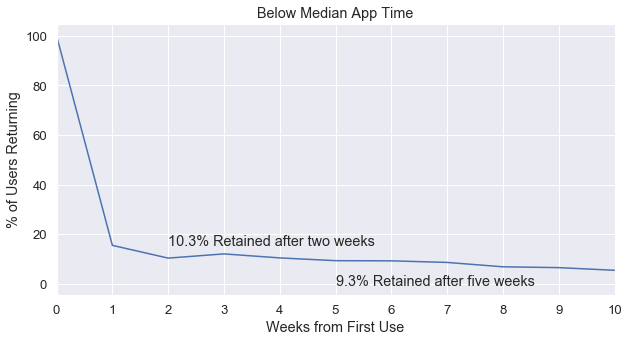

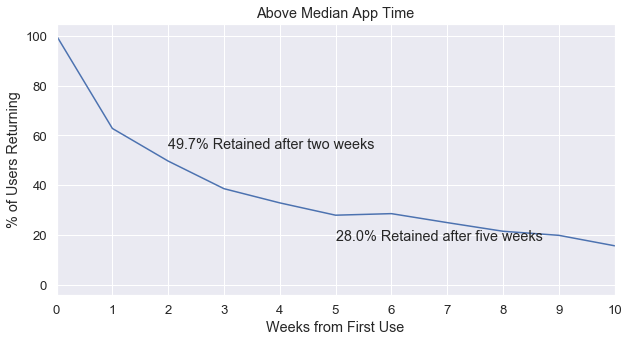

In [59]:
two_plots(df_with_usage, 'TwoWeeksAppTime', 0.5, 'Below Median App Time','Above Median App Time')

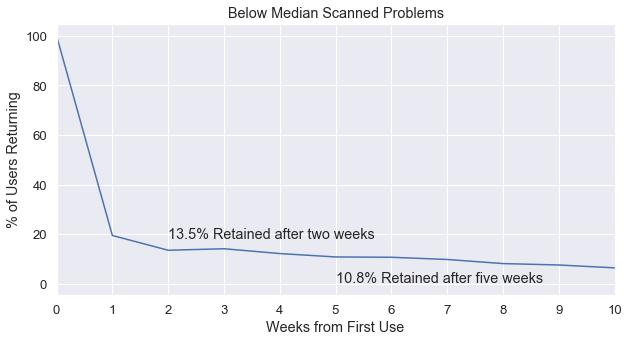

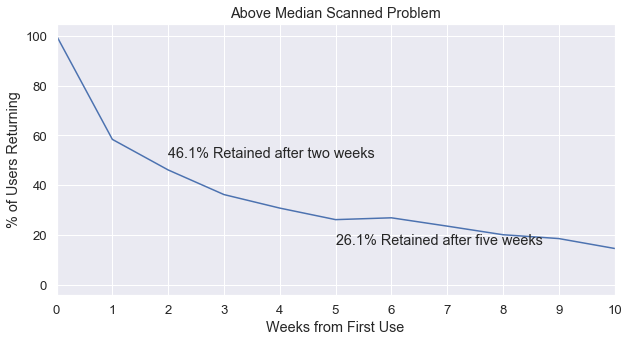

In [60]:
two_plots(df_with_usage, 'TwoWeeksScanned', 0.5, 'Below Median Scanned Problems','Above Median Scanned Problem')

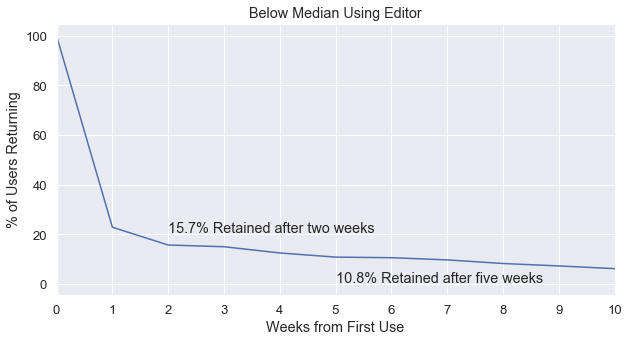

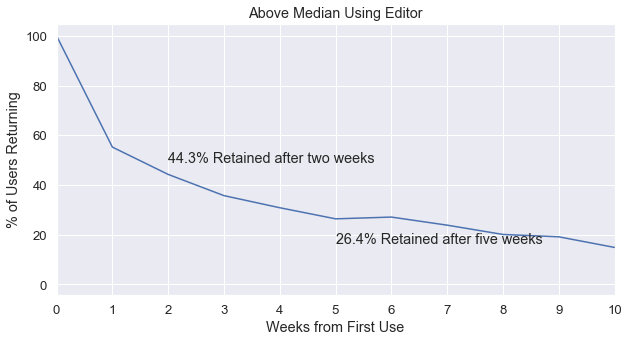

In [61]:
two_plots(df_with_usage, 'TwoWeeksEditor', 0.5, 'Below Median Using Editor','Above Median Using Editor')

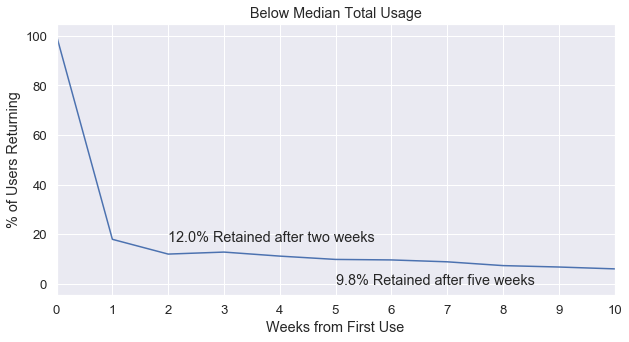

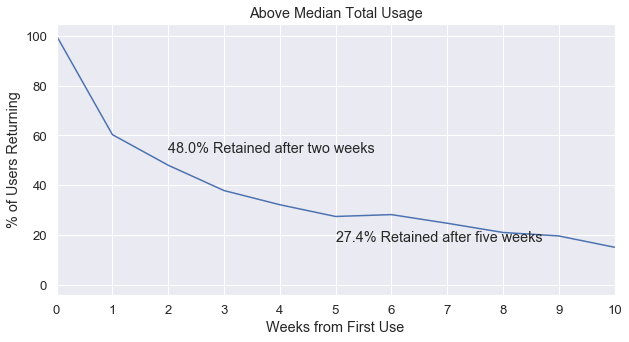

In [62]:
two_plots(df_with_usage, 'TwoWeeksTotal', 0.5, 'Below Median Total Usage','Above Median Total Usage')

### Revisiting the drop in retention for Non-American Users

Table from Above (For Comparison)

| Metric | Above/Below Median | 2-week | 5-week |
|--------|-------------| ------ | ------ |
| App Time | <p>Above <p> Below | <p> 49.7% <p>10.3% |  <p> 28.0% <p>9.3%|
| Scanned Problems | <p>Above <p> Below | <p> 46.1% <p>13.5% |  <p> 26.1% <p>10.8%|
| Editor Problems | <p>Above <p> Below | <p> 44.3% <p>15.7% |  <p> 26.4% <p>10.8%|  
| Total Events | <p>Above <p> Below | <p> 48.0% <p>12.0% |  <p> 27.4% <p>9.8%|



Retention by Usage (Non-Americans)

| Metric | Above/Below Median | 2-week | % Change | 5-week | % Change |
|--------|-------------| ------ | ------ | --- | --- |
| App Time | <p>Above <p> Below | <p> 45.8% <p>10.3% | <p> -7.8% <p> 0.0% |  <p> 24.0% <p>8.7%| <p> -14.3%% <p>-6.5% |
| Scanned Problems |<p>Above <p> Below| <p> 38.7% <p>11.1% | <p> -16.1% <p> -17.8% | <p> 16.1% <p>11.1% | <p> -37.9% <p>+2.8% |
| Editor Problems | <p>Above <p> Below| <p> 38.4% <p>16.3% | <p> -13.3% <p> +3.8% | <p> 22.8% <p>9.7%| <p> -13.6% <p>-10.2% |  
| Total Events | <p>Above <p> Below | <p> 42.2% <p>13.0% | <p> -12.1% <p> +8.3% | <p> 24.0% <p>8.4%| <p> -12.4% <p>-14.3% |
   
   
**How to Use the Table**
- Which metric has the largest difference from the Total?
    - Especially when above the Median
    
**Results**
- Above Median for Scanned Problems has big decrease
    - Non-Americans not yielding as much value
    - Can use a lot, but won't retain
    - Two Directions:
        - Figure out **why**
        - Prioritize improving the Editor

In [63]:
non_american_usage = df_with_usage[df_with_usage['Country'] != 'United States']

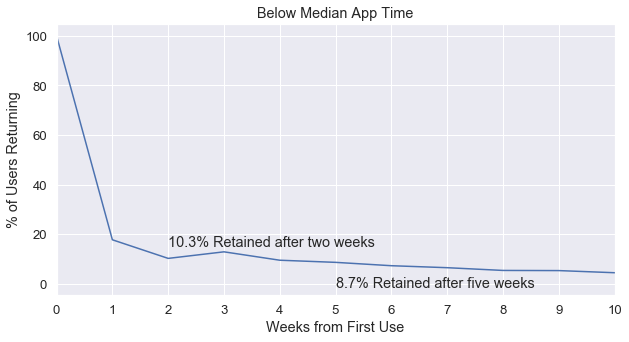

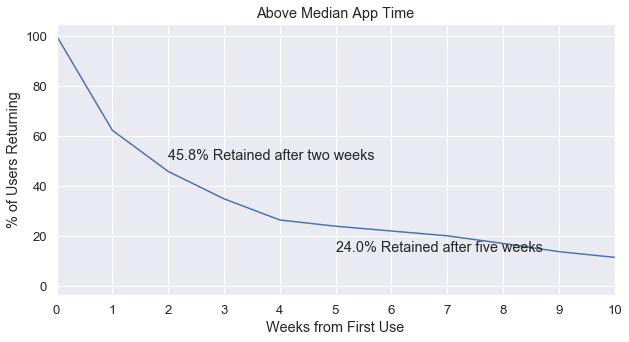

In [64]:
two_plots(non_american_usage, 'TwoWeeksAppTime', 0.5, 'Below Median App Time','Above Median App Time')

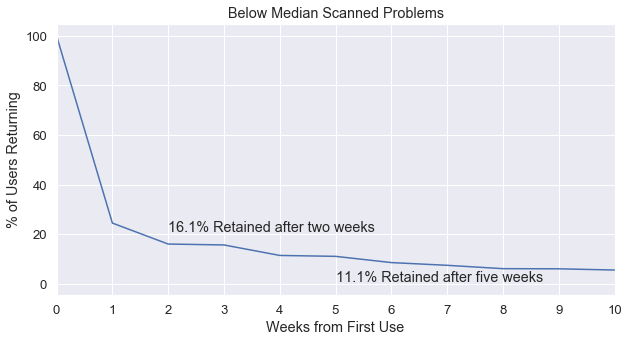

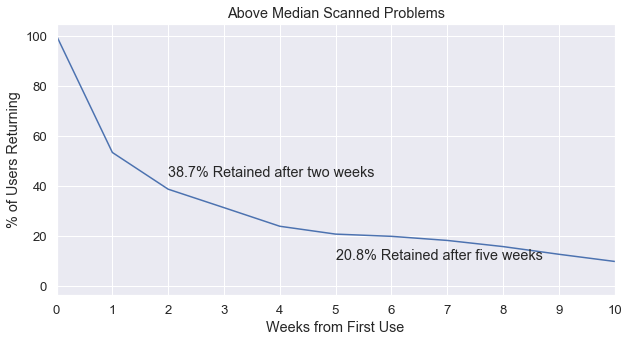

In [65]:
two_plots(non_american_usage, 'TwoWeeksScanned', 0.5, 'Below Median Scanned Problems','Above Median Scanned Problems')

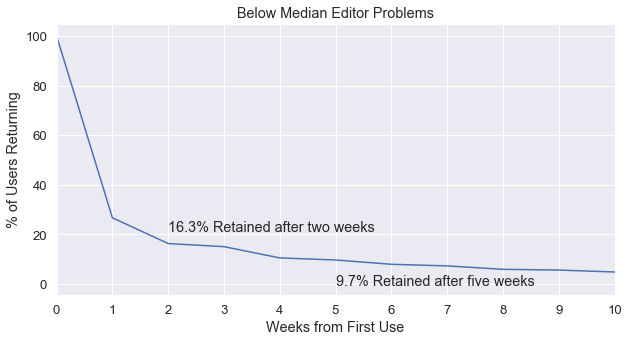

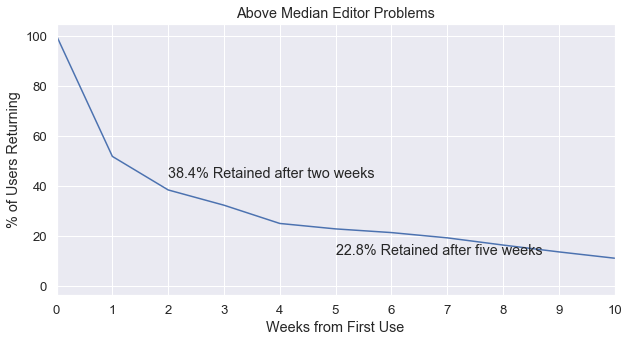

In [66]:
two_plots(non_american_usage, 'TwoWeeksEditor', 0.5, 'Below Median Editor Problems','Above Median Editor Problems')

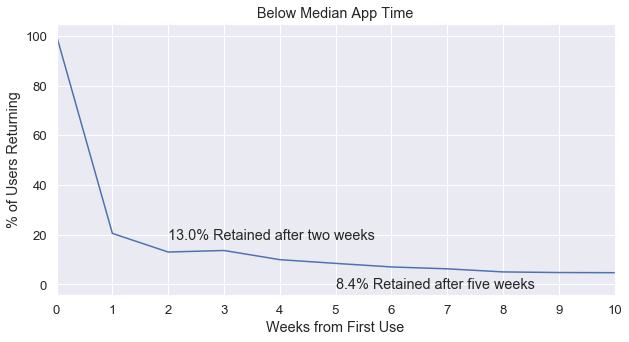

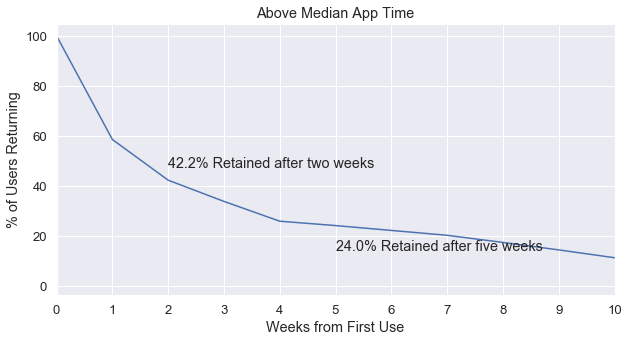

In [67]:
two_plots(non_american_usage, 'TwoWeeksTotal', 0.5, 'Below Median App Time','Above Median App Time')

- Non-American's use Editor 1/2 amount of Total 

In [68]:
df_with_usage.describe()

,SumAppTime,CountScannedProblems,CountEditorProblems,TotalEventsPerUser,WeeksOut,TwoWeeksAppTime,TwoWeeksScanned,TwoWeeksEditor,TwoWeeksTotal
count,1.317820e+05,131782.000000,131782.000000,131782.000000,131782.000000,1.317820e+05,131782.000000,131782.000000,131782.000000
mean,1.373598e+04,7.373579,14.924572,471.101584,5.385356,1.251242e+05,37.493611,93.675783,2701.691240
std,3.517725e+06,14.391587,37.974426,755.435903,5.372974,1.176819e+07,56.621043,177.608514,3824.589692
min,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,8.200000e+01,0.000000,0.000000,72.000000,1.000000,5.160000e+02,7.000000,8.000000,589.000000
50%,2.310000e+02,2.000000,2.000000,220.000000,4.000000,1.427000e+03,19.000000,40.000000,1481.000000
75%,5.390000e+02,8.000000,14.000000,575.000000,9.000000,3.428000e+03,45.000000,110.000000,3397.000000
max,1.141813e+09,473.000000,1437.000000,80434.000000,19.000000,1.141815e+09,838.000000,3120.000000,83439.000000


In [69]:
non_american_usage.describe()

,SumAppTime,CountScannedProblems,CountEditorProblems,TotalEventsPerUser,WeeksOut,TwoWeeksAppTime,TwoWeeksScanned,TwoWeeksEditor,TwoWeeksTotal
count,1.556900e+04,15569.000000,15569.000000,15569.000000,15569.000000,1.556900e+04,15569.000000,15569.000000,15569.000000
mean,1.106122e+05,6.092556,12.850986,489.414413,4.518081,1.030102e+06,40.978098,71.720342,3085.871154
std,1.023405e+07,15.005501,32.620839,817.796873,5.115340,3.422527e+07,79.450433,137.789313,5253.308861
min,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,6.700000e+01,0.000000,0.000000,58.000000,0.000000,4.450000e+02,4.000000,2.000000,579.000000
50%,2.310000e+02,1.000000,0.000000,209.000000,2.000000,1.106000e+03,17.000000,21.000000,1481.000000
75%,4.420000e+02,6.000000,11.000000,578.000000,7.000000,3.177000e+03,43.000000,74.000000,3823.000000
max,1.141813e+09,383.000000,937.000000,16367.000000,19.000000,1.141815e+09,653.000000,1412.000000,53726.000000


## Findings & Recommendations

### There is a drop in retention between American’s and Non-Americans. 

- Sessions were **more likely** to have at least one **Scan**
- Despite this, **Editor  is used more times in total** 


- Americans use Editor twice as much as Non-Americans
    - Largest difference. Could lead to loss in retention?
    - Trouble with access?


For the A/B test
- Since renention drops for Non-Americans, try "Translations", or less language-based instructions
    - Specifically try increasing Editor
    
- From Retention Metrics charts
    - \# of Scanned Problems for Non-Americans doesn't increase retention
        - Team should be focusing on Editor to increase retention for Non-Americans
        
        
Further Findings 
- UK is not being utilized. Potentially try increasing market/marketing here
    - Since marketing is new 
- Nigeria has 80,000,000 English speakers
    - Tap into underdeveloped Countries + Improve translation capabilities
    
**Data that could be useful in the future**

- Specific Events rather than "Total Events"
    - Perform same analysis with different events
- Usage in different languages (if thats available)
- At least 2 Months of data for start dates
    - Retention could change depending on day of install
    
- Teacher vs. Student vs. Parent
    - Need a column with categorical data

In [123]:
country_retention = {}

for country in df_with_usage['Country'].unique():
    country_df = df_with_usage[df_with_usage['Country'] == country]
    
    if len(country_df) >= 50:
    
        retention = get_retention_metrics(country_df)

        if (len(retention) >= 3):
            if (retention.index[2] == 2):
                two_week_retention = get_retention_metrics(country_df).loc[2].values[0]
                country_retention[country] = two_week_retention
                


In [124]:
{k: v for k, v in sorted(country_retention.items(), key=lambda item: item[1], reverse = True)[:15]}

{'Paraguay': 100.0,
 'Brazil': 83.33333333333334,
 'Uzbekistan': 75.0,
 'Portugal': 66.66666666666666,
 'Armenia': 66.66666666666666,
 'Guatemala': 60.0,
 'Mauritius': 55.55555555555556,
 'Germany': 52.94117647058824,
 'South Africa': 52.94117647058824,
 'Georgia': 52.17391304347826,
 'Mongolia': 51.85185185185185,
 'Sweden': 50.0,
 'Netherlands': 50.0,
 'Austria': 44.44444444444444,
 231.0: 43.75}